# M40006 In-Course Assessment (Alternative)

# 20 June 2022, 9-11 am

## Two Hours

### Answer all questions, submitting your answers as a single Jupyter notebook.

To carry out this assignment, you may find useful:
<ul>
    <li>the builtin <code>print</code>, <code>range</code> and <code>pow</code> functions;</li>
    <li>the <code>sqrt</code> and <code>log</code> functions from the <code>math</code> module;</li>
    <li>the functions <code>linspace</code>, <code>arange</code>, <code>array</code>, <code>zeros</code>, <code>log</code> and <code>transpose</code>, and the <code>reshape</code> method, from the <code>numpy</code> module;</li> 
    <li>the functions <code>symbols</code>, <code>solve</code>, <code>Eq</code>, <code>diff</code>, <code>lambdify</code>, <code>expand</code> and <code>simplify</code>, and the <code>subs</code> method from the <code>sympy</code> module;</li> 
    <li>the <code>time</code> function from the <code>time</code> module;</li>
    <li>the <code>count</code> function from the <code>itertools</code> module;</li>
    <li>the <code>plot</code> function from the <code>pyplot</code> module of <code>matplotlib</code>.
</ul>

<b>Important</b>: the above is not an exhaustive list, and you may wish to import other functions or other modules.

It is recommended that you simply execute the following code cell:

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sympy as sp
from math import sqrt, log
from time import time
from itertools import count

# Question 1 (25 marks)

The following is some exceptionally badly-designed code for testing whether or not an integer `p`, greater than 1, is prime.

In [1]:
def is_prime(p):
    'Tests whether the integer p>1 is prime'
    
    prime = True
    for r in range(2, p):
        if p%r == 0:
            prime = False
    return prime

(a) Briefly test this function on some known prime and non-prime numbers, keeping them fairly small.

In [2]:
[(p,is_prime(p)) for p in range(2,21)]

[(2, True),
 (3, True),
 (4, False),
 (5, True),
 (6, False),
 (7, True),
 (8, False),
 (9, False),
 (10, False),
 (11, True),
 (12, False),
 (13, True),
 (14, False),
 (15, False),
 (16, False),
 (17, True),
 (18, False),
 (19, True),
 (20, False)]

We're now going to investigate the complexity of this algorithm: the dependence of its execution time on the size of the problem. Here, we'll take the size of the problem to be the amount of information necessary to specify `p`, which is the number of digits it has in binary notation. This is given approximately by

$$n = \log_2 p.$$

(b) Explain briefly why we can say that this algorithm is both $O(2^n)$ and $\Omega(2^n)$, and hence that it is $\Theta(2^n)$.

The number of iterations is $p-2 = 2^n - 2$, meaning that in the best or worst case, it's of order $2^n$.

(c) This function works by testing whether `r` is a factor of `p` for values of `r` between 2 and `p-1`. In fact, we only need to go as far as $r=\sqrt{p}$. Write and test a version of the function (to which you should give a different name) that has been improved in this way, and describe the way its execution time depends on $n=\log_2p$ using big $O$, big $\Omega$ and big $\Theta$ notation.

In [7]:
def is_prime1(p):
    'Tests whether the integer p>1 is prime'
    
    prime = True
    for r in range(2, int(sqrt(p))+1):
        if p%r == 0:
            prime = False
    return prime
[(p,is_prime1(p)) for p in range(2,21)]

[(2, True),
 (3, True),
 (4, False),
 (5, True),
 (6, False),
 (7, True),
 (8, False),
 (9, False),
 (10, False),
 (11, True),
 (12, False),
 (13, True),
 (14, False),
 (15, False),
 (16, False),
 (17, True),
 (18, False),
 (19, True),
 (20, False)]

Best case is same as worst case: the number of iterations is $\sqrt{p}-2 = 2^{n/2} - 2$, we have $O(2^{n/2})$, $\Omega(2^{n/2})$, $\Theta(2^{n/2})$.

(d) Another issue with the original code is that even when it finds a factor, it keeps on checking; in fact, if it finds a factor, `p` can't be prime, and the algorithm can therefore stop and report `False`. Write and test a version (to which, again, you should give a different name) that does this, and describe the way its execution time depends on $n=\log_2p$ using big $O$ and big $\Omega$ notation.

In [9]:
def is_prime2(p):
    'Tests whether the integer p>1 is prime'
    
    for r in range(2, int(sqrt(p))+1):
        if p%r == 0:
            return False
    return True
[(p,is_prime2(p)) for p in range(2,21)]

[(2, True),
 (3, True),
 (4, False),
 (5, True),
 (6, False),
 (7, True),
 (8, False),
 (9, False),
 (10, False),
 (11, True),
 (12, False),
 (13, True),
 (14, False),
 (15, False),
 (16, False),
 (17, True),
 (18, False),
 (19, True),
 (20, False)]

Still $O(2^{n/2})$, but now in the best case, we only need one iteration: $\Omega(1)$.

(e) As a final optimisation, we can use the fact that apart from 2 and 3, all primes are either one less, or one greater, than a multiple of 6.

The current version tests whether `i` is a factor for $i=2,3,4,5,6,7,\dots$, but in fact we need only test $i=2$ and $i=3$, and then test $i=6-1=5$, $i=6+1=7$, $i=12-1=11$, $i=12+1=13$, etc. We will end up testing <em>some</em> composite values of `i`, but we'll still be able to get the job done quicker.

Write and test a version (with a different name) that does this, and describe the way its execution time depends on $n=\log_2p$ using big $O$ and big $\Omega$ notation.

In [14]:
from math import sqrt
def is_prime3(p):
    'Tests whether the integer p is prime'
    
    if p == 2 or p == 3:
        return True
    
    if p%2==0 or p%3 == 0:
        return False
    
    for r in range(1, int(sqrt(p)/6)+1):
        if p%(6*r-1) == 0:
            return False
        if p%(6*r+1) == 0:
            return False
    return True
[is_prime3(n) for n in range(1,12)]

[False, True, True, False, True, False, True, False, False, False, True]

Still $O(2^{n/2})$, because the number of iterations is still proportional to $\sqrt{p} - 2$; still $\Omega(1)$.

(f) Using the `time` function from the `time` module, or otherwise, compare the execution time in seconds of the given function `is_prime`, and your final, optimised version, in testing the numbers 46728119 and 46728127 for primality.

In [15]:
from time import time

start = time()
print(is_prime(46728119))
print(time()-start)

start = time()
print(is_prime(46728127))
print(time()-start)

start = time()
print(is_prime3(46728119))
print(time()-start)

start = time()
print(is_prime3(46728127))
print(time()-start)

False
10.583137512207031
True
10.286290407180786
False
0.0010466575622558594
True
0.0009663105010986328


# Question 2 (25 marks)

It turns out that simply checking factors in this way is a terrible way of testing for primality, even when we optimise the algorithm. A number of other approaches exist.

One of them depends on expressing an integer as a product of the form $2^r\times d$, where $r$ is an integer and $d$ is odd. Here's some code for doing that:

In [2]:
def even_odd_pair(a):
    'Returns r and d such that a = 2**r*d and d is odd'
    r = 0
    while a%2 == 0:
        r += 1
        a //= 2
    return r, a

(a) Test this function.

In [17]:
[even_odd_pair(2**r*7*13) for r in range(10)]

[(0, 91),
 (1, 91),
 (2, 91),
 (3, 91),
 (4, 91),
 (5, 91),
 (6, 91),
 (7, 91),
 (8, 91),
 (9, 91)]

(b) Write, and test, a <b>recursive</b> version of this function: one that contains no `for` or `while` loops, but which works by calling itself.

In [18]:
def even_odd_pair2(a):
    'Returns r and d such that a = 2**r*d and d is odd'
    if a%2 != 0:
        return 0, a
    else:
        r, d = even_odd_pair2(a//2)
        return 1 + r, d
[even_odd_pair2(2**r*7*13) for r in range(10)]

[(0, 91),
 (1, 91),
 (2, 91),
 (3, 91),
 (4, 91),
 (5, 91),
 (6, 91),
 (7, 91),
 (8, 91),
 (9, 91)]

A theorem in number theory states that if $p$ is prime, and if $p-1 = 2^r\times d$, where $r$ is an integer and $d$ is odd, then for any given base $a$ that is not a multiple of $p$, $p$ has the following property, which we'll call property $X_a$:

<b>Property $X_a$</b>:

EITHER
$$a^d \equiv 1 \ \ ({\rm mod}\ \ p)$$
OR there exists some integer $s$, with $0\le s\le r-1$, for which
$$a^{2^s \times d} \equiv p-1 \ \ ({\rm mod}\ \ p).$$


(c) Choosing `a=5` as the base, verify that each of the primes 47415209, 74279657 and 73595449 has property $X_5$. (You'll find the builtin `pow` function useful here.)

In [21]:
a = 5

p = 47415209
r, d = even_odd_pair(p-1)
print([pow(a,2**s*d,p) for s in range(r)])

p = 74279657
r, d = even_odd_pair(p-1)
print([pow(a,2**s*d,p) for s in range(r)])

p = 73595449
r, d = even_odd_pair(p-1)
print([pow(a,2**s*d,p) for s in range(r)])

[27105621, 47415208, 1]
[12650271, 578472, 74279656]
[1, 1, 1]


(d) Write and test a function called `base_test`, which takes as its arguments integers `a` and `p`, both greater than 1, and returns `True` if `p` has property $X_a$. There will be marks for making your code reasonably efficient.

In [3]:
def base_test(a, p):
    r, d = even_odd_pair(p-1)
    x = pow(a, d, p)
    if x == 1 or x == p-1:
        return True
    for i in range(r-1):
        x = pow(x, 2, p)
        if x == p-1:
            return True
    return False
[base_test(5,p) for p in [47415209,74279657,73595449]]

[True, True, True]

In [4]:
base_test(5,4)

True

(e) Show that the converse of the above theorem is false, by writing code that finds a <em>composite</em> number that has property $X_5$.

In [23]:
for p in count(9,2):
    if base_test(5,p) and not is_prime3(p):
        print(p)
        break

781


It is known that provided certain key conjectures in number theory are true, `p` is <em>guaranteed</em> to be prime provided it has property $X_a$ to all bases $a$ between 2 and $\log_e(p)^2$ inclusive.

(f) Write and test a primality testing function based on this fact. There will be marks for writing fairly efficient code. Test its performance on 46728119 and 46728127 using the time function, or otherwise.

In [26]:
def base_test2(a, p, r, d):
    x = pow(a, d, p)
    if x == 1 or x == p-1:
        return True
    for i in range(r-1):
        x = pow(x, 2, p)
        if x == p-1:
            return True
    return False
def is_prime4(p):
    'Tests whether the integer p is prime'
    
    if p == 2 or p == 3:
        return True
    
    if p%2==0 or p%3 == 0:
        return False
    
    r, d = even_odd_pair(p-1)
    for base in range(2,min(p-2,int(2*log(p)**2)+1)):
        if not base_test2(base, p, r, d):
            return False
    return True

print([is_prime4(n) for n in range(1,12)])

start = time()
print(is_prime4(46728119))
print(time()-start)

start = time()
print(is_prime4(46728127))
print(time()-start)

[False, True, True, False, True, False, True, False, False, False, True]
False
0.0009965896606445312
True
0.003889322280883789


# Question 3 (25 marks)

This question concerns iterations of the <b>logistic map</b>,
$$f_k(x) = k\,x\,(1-x).$$
Here, $k$ is a real parameter between $0$ and $4$ inclusive, and $x$ a real state variable between $0$ and $1$.

(a) On a single pair of axes, create plots of the function $k\,x\,(1-x)$ against $x$, for $0\le x \le 1$, for each of the five cases $k= 2.0, 2.5, 3.0, 3.5$ and $4.0$. Also on the same pair of axes, show the line $y=x$.

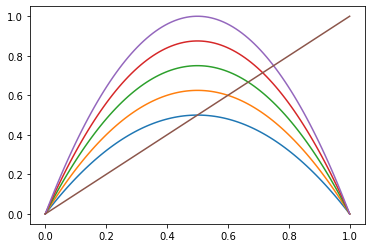

In [27]:
x = np.linspace(0,1,100)
for k in np.linspace(2.0,4.0,5):
    plt.plot(x, k*x*(1-x))
plt.plot(x,x)

(b) Setting $k=3.2$ and $x_0 = 0.3$, calculate the iterates $x_1, x_2, x_3, \dots, x_{50}$ generated by
$$x_{n+1} = f_k(x_n),$$
creating a Python list with 51 elements, including $x_0$.
Create a line plot of this list of iterates; the horizontal coordinates should be the integers $0, 1, 2, \dots, 50$.

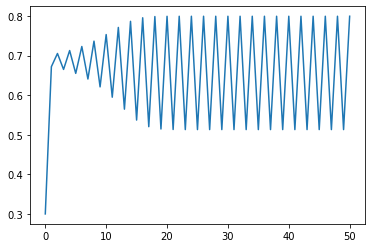

In [31]:
k = 3.2
x = 0.3
xlist = [x]

for i in range(50):
    x = k*x*(1-x)
    xlist.append(x)

plt.plot(range(0,51),xlist)

(c) In the case $k=3.7$, show, on the same pair of axes, a plot of the iteration that begins with $x_0 = 0.3$ and a plot of the iteration that begins with $x_0 = 0.3001$; in each cases, show the iterates from $x_0$ to $x_{50}$. Briefly describe what this diagram suggests.

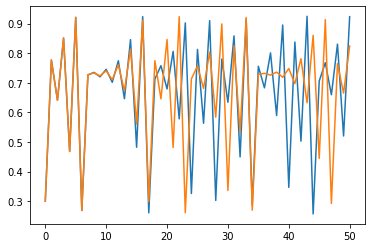

In [32]:
k = 3.7
xa, xb = 0.3, 0.3001
xalist, xblist = [xa], [xb]

for i in range(50):
    xa, xb = k*xa*(1-xa), k*xb*(1-xb)
    xalist.append(xa)
    xblist.append(xb)

plt.plot(range(0,51),xalist,range(0,51),xblist)

Sensitive dependence on initial conditions, or equivalent.

As you may have seen, for some values of the parameter $k$ the logistic map exhibits <b>sensitive dependence on initial conditions</b>: trajectories of the map that begin close by one another tend to drift apart, eventually becoming very different.

One measure of this sensitive dependence, for a given parameter value and a given starting value $x_0$, is known as the <b>Lyapunov exponent</b>. This is defined as

$$\lim_{N \to \infty} \frac{1}{N+1}\,\sum_{r=0}^N \log_e\left(\left|f'(x_r)\right|\right).$$

(Note that the $r$th term consists of the logarithm of the absolute value of the derivative at $x_r$.) It can be shown that under suitable conditions the choice of $x_0$ makes no difference to the value of the Lyapunov exponent.

Obviously, we can't use infinitely many values like that in practice; instead, we <em>estimate</em> the Lyapunov exponent by truncation; that is, we simply choose a large value of $N$, say $N=10000$, and calculate
$$\frac{1}{N+1}\,\sum_{r=0}^N \log_e\left(\left|f'(x_r)\right|\right).$$

If this value is positive, then there is sensitive dependence; if it's negative, then there isn't.

(d) Using $x_0 = 0.3$ and $N=10000$, estimate the Lyapunov exponent of the logistic map in the cases $k=3.2$ and $k=3.7$, showing that the former is negative and the latter positive.

In [33]:
x = 0.3
N = 10000

k = 3.2
total = np.log(abs(k*(1-2*x)))
for i in range(N):
    x = k*x*(1-x)
    total += np.log(abs(k*(1-2*x)))
print(total/(N+1))

k = 3.7
total = np.log(abs(k*(1-2*x)))
for i in range(N):
    x = k*x*(1-x)
    total += np.log(abs(k*(1-2*x)))
print(total/(N+1))

-0.9145910793367767
0.3509416272898342


(e) Fix $x_0=0.3$ and $N=10000$. For the $k$-values $2.500, 2.501, 2.502, \dots, 4.000$, estimate the Lyapunov exponent of the logistic map, and plot this estimate against $k$. Also show on your diagram the horizontal line with vertical coordinate zero.

<b>Note</b>: for top marks, you should do this in as <b>vectorized</b> a way as you can, avoiding unnecessary loops, and relying instead on NumPy arrays. (Obviously, you'll need a loop to perform the iteration, but you shouldn't also need to loop through the values of $k$.) If you do this, the execution time should be OK, but if you do run into execution time problems, you may want to reduce the value of $N$ to 1000, or use a larger $k$-step, or both. A few marks will be lost if you find you need to do that, but most will still be available.

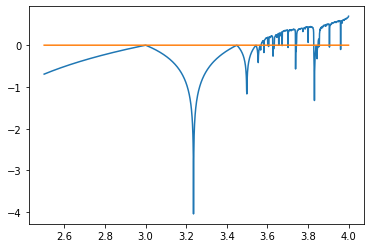

In [34]:
x = 0.3
N = 10000

k = np.linspace(2.5,4.0,1501)
total = np.log(abs(k*(1-2*x)))
for i in range(N):
    x = k*x*(1-x)
    total += np.log(abs(k*(1-2*x)))
plt.plot(k, total/(N+1), k, np.zeros(1501))

# Question 4 (25 marks)

This question is also concerned with the logistic map.

(a) Write and test a function called `logistic_iterates`. It should take as its arguments:
<ul>
    <li>a value of the parameter <code>k</code>;</li>
    <li>a value of <code>x0</code>;</li>
    <li>a non-negative integer <code>nskip</code>;</li>
    <li>a non-negative integer <code>nkeep</code>.</li>
</ul>

It should then:
<ul>
    <li>iterate the logistic map <code>nskip</code> times, discarding all the values except the last one;</li>
    <li>iterate the logistic map <code>nkeep</code> times, returning a list of length <code>nkeep + 1</code>, containing the iterates $x_{nskip}, x_{nskip+1}, x_{nskip+2}, \dots, x_{nskip+nkeep}$.
</ul>

In [36]:
def logistic_iterates(k, x0, nskip, nkeep):
    for i in range(nskip):
        x0 = k*x0*(1-x0)
    xlist = [x0]
    for i in range(nkeep):
        x0 = k*x0*(1-x0)
        xlist.append(x0)
    return xlist

(b) Compare the outputs of
```python
logistic_iterates(3.2, 0.3, 1000, 10)
```
and
```python
logistic_iterates(3.7, 0.3, 1000, 10)
```
commenting briefly on what you see.

In [37]:
print(logistic_iterates(3.2, 0.3, 1000, 10))
print(logistic_iterates(3.7, 0.3, 1000, 10))

[0.7994554904673701, 0.5130445095326298, 0.7994554904673701, 0.5130445095326298, 0.7994554904673701, 0.5130445095326298, 0.7994554904673701, 0.5130445095326298, 0.7994554904673701, 0.5130445095326298, 0.7994554904673701]
[0.7121765030484498, 0.7584301867502854, 0.6778912027319867, 0.8079124639650987, 0.5742026837792846, 0.9046276583638204, 0.3192228949219423, 0.8040826616345085, 0.5828748191051102, 0.8995875281256924, 0.33422028725567615]


In first case, a 20-cycle; in the second, no apparent pattern.

(c) This section is a plotting challenge. The task is to create a so-called <b>bifurcation diagram</b> for the logistic map. 

A bifurcation diagram is a <b>point plot</b>; note that it's not a line plot. It is a single diagram, on a single pair of axes.

On the horizontal axis you'll be plotting values of $k$ between $2.5$ and $4.0$. 

On the vertical axis, for each value of $k$, you'll be plotting all $101$ elements of
```python
logistic_iterates(k, 0.3, 1000, 100)
```
so that corresponding to each value of $k$ there will be 101 points, with coordinates $(k, x_{1000}), (k, x_{1001}),(k, x_{1002}), \dots, (k, x_{1100})$.

Choose a small value of `markersize`; say 0.05.

(There are relatively fast and relatively slow ways to do this; doing it in a really fast, vectorized way is a genuine challenge. Some marks will be available for efficiency, but not all that many--the main thing is to get it to work.)

Use a $k$-step of 0.001 (so the values of $k$ will be $2.500, 2.501, 2.502, \dots, 4.000$).

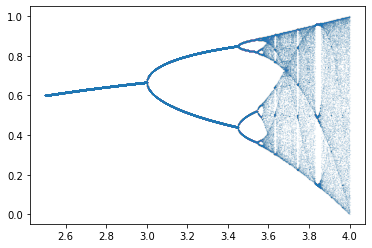

In [38]:
def logistic_iterates2(k, x0, nskip, nkeep):
    for i in range(nskip):
        x0 = k*x0*(1-x0)
    its = [np.array([k,x0])]
    for i in range(nkeep):
        x0 = k*x0*(1-x0)
        its.append(np.array([k,x0]))
    return np.array(its)
nskip, nkeep = 1000, 100
kdata = np.linspace(2.5,4.0,1501)
bifurc_data=np.transpose(logistic_iterates2(kdata, 0.3, 10000, nkeep),
                         axes=(0,2,1)).reshape((nkeep+1)*len(kdata),2)
plt.plot(bifurc_data[:,0],bifurc_data[:,1],'.',markersize=0.05)

(d) The <b>fixed points</b> of the logistic map are those values of $x$ for which $f_k(x) = x$. Using SymPy, show that the logistic map has fixed points at $x=0$ and $x=(k-1)/k$.

In [39]:
x, k = sp.symbols('x k')
sp.solve(sp.Eq(k*x*(1-x),x),x)

[0, (k - 1)/k]

Fixed points at which the derivative is numerically less than one are stable; those for which it is numerically greater than one are unstable.

(e) Using SymPy, find the value of $k$ at which the second fixed point transitions from stable to unstable: that is, the value of $k$ for which the derivative $f'(x)$ at $x=(k-1)/k$ is exactly $-1$.

Explain briefly what point on your bifurcation diagram this corresponds to.

In [40]:
deriv = sp.diff(k*x*(1-x),x)
fp_deriv = deriv.subs(x,(k-1)/k)
sp.solve(sp.Eq(fp_deriv,-1),k)

[3]

Point where it becomes a 2-cycle.

<b>Period-2 points</b> for the logistic map are values of $x$ for which
$$f_k(f_k(x)) = x,$$
but which are <em>not</em> fixed points.

(f) Using SymPy, find, in terms of $k$, the period-2 points for the logistic map (there are two of them).

In [41]:
logistic = k*x*(1-x)
logistic2 = logistic.subs(x,logistic)
sp.solve(sp.Eq(logistic2,x),x)

[0,
 (k - 1)/k,
 (k - sqrt(k**2 - 2*k - 3) + 1)/(2*k),
 (k + sqrt(k**2 - 2*k - 3) + 1)/(2*k)]

It can be shown that if the product of the derivatives at both of the period-2 points is numerically less than 1, then the map will tend towards a stable oscillation between those two points, but that if it is numerically greater than 1, then this oscillation becomes unstable.

(g) Using SymPy, show that the product of the derivatives at the two period-2 points simplifies to $-k^2+2\,k+4$.

In [42]:
x1, x2 = (k - sp.sqrt(k**2 - 2*k - 3) + 1)/(2*k), (k + sp.sqrt(k**2 - 2*k - 3) + 1)/(2*k)
derivprod = sp.simplify(deriv.subs(x,x1)*deriv.subs(x,x2))
derivprod

-k**2 + 2*k + 4

(h) Using SymPy, find the positive value of $k$ at which the period-2 cycle transitions from stable to unstable: that is, the value for which the product of the derivatives at the two period-2 points is exactly $-1$.

Explain briefly what points on your bifurcation diagram this corresponds to.

In [43]:
[float(kval) for kval in sp.solve(sp.Eq(derivprod,-1),k)]

[-1.449489742783178, 3.449489742783178]

Point where it becomes a 4-cycle.